# Discrete Choice Modeling (Conjoint) R - Market Research
## Simulated Data for Generic Smartphone


**Design**  
* Full Factorial Design  
* Four Factors: Size, Resolution, CPU_GPU, Price
* Simulated Respondents: 300

**Analysis**
* Factor Level Importance
* Hypothetical Market Share
* Market Share Sensitivty Plot 

In [1]:
#Load Synthetic Data
options(warn=-1)
setwd('C:/Users/Remote2/OneDrive/Data Science/R Data/Conjoint/Syth Conjoint')
load('C:/Users/Remote2/OneDrive/Data Science/R Data/Conjoint/Syth Conjoint/synthconj.RData')

In [2]:
#Display Factor Data
head(factor)

$Size
[1] "5"   "5.7" "6.7"

$Resolution
[1] "1080P" "4K"   

$CPU_GPU
[1] "Low"  "Med"  "High"

$price
[1] "500" "700" "900"

In [3]:
#Dsiplay profiles. There are a total of 54 profiles with the first 6 shown below.
head(profiles)

Size,Resolution,CPU_GPU,price
<fct>,<fct>,<fct>,<fct>
5,1080P,Low,500
5.7,1080P,Low,500
6.7,1080P,Low,500
5,4K,Low,500
5.7,4K,Low,500
6.7,4K,Low,500


In [4]:
#Display user choice data.
head(conj.df)

,resp.id,ques,alt,use_work,Size,Resolution,CPU_GPU,price,choice
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
2,1,1,1,yes,5.7,1080P,Low,500,0
18,1,1,2,yes,6.7,4K,High,500,1
34,1,1,3,yes,5,4K,High,700,0
33,1,2,1,yes,6.7,1080P,High,700,1
24,1,2,2,yes,6.7,4K,Low,700,0
31,1,2,3,yes,5,1080P,High,700,0


In [5]:
###Summary###
summary(conj.df)

    resp.id            ques         alt    use_work    Size      Resolution  
 Min.   :  1.00   Min.   : 1   Min.   :1   yes:4140   5  :4492   1080P:6723  
 1st Qu.: 75.75   1st Qu.: 4   1st Qu.:1   no :9360   5.7:4518   4K   :6777  
 Median :150.50   Median : 8   Median :2              6.7:4490               
 Mean   :150.50   Mean   : 8   Mean   :2                                     
 3rd Qu.:225.25   3rd Qu.:12   3rd Qu.:3                                     
 Max.   :300.00   Max.   :15   Max.   :3                                     
 CPU_GPU     price          choice      
 Low :4496   500:4506   Min.   :0.0000  
 Med :4495   700:4479   1st Qu.:0.0000  
 High:4509   900:4515   Median :0.0000  
                        Mean   :0.3333  
                        3rd Qu.:1.0000  
                        Max.   :1.0000  

#### ANALYSIS  
The simulated data looks good. Three dataframes (df) were created (creation not shown): a factor df, a profiles df listing all possible combinations of factor levels (bundles) and the user choice df. In the survey, a simulated respondent is show a series of discrete choices between two bundles and asked to select their preference. This is recorded under choice in the choice df.

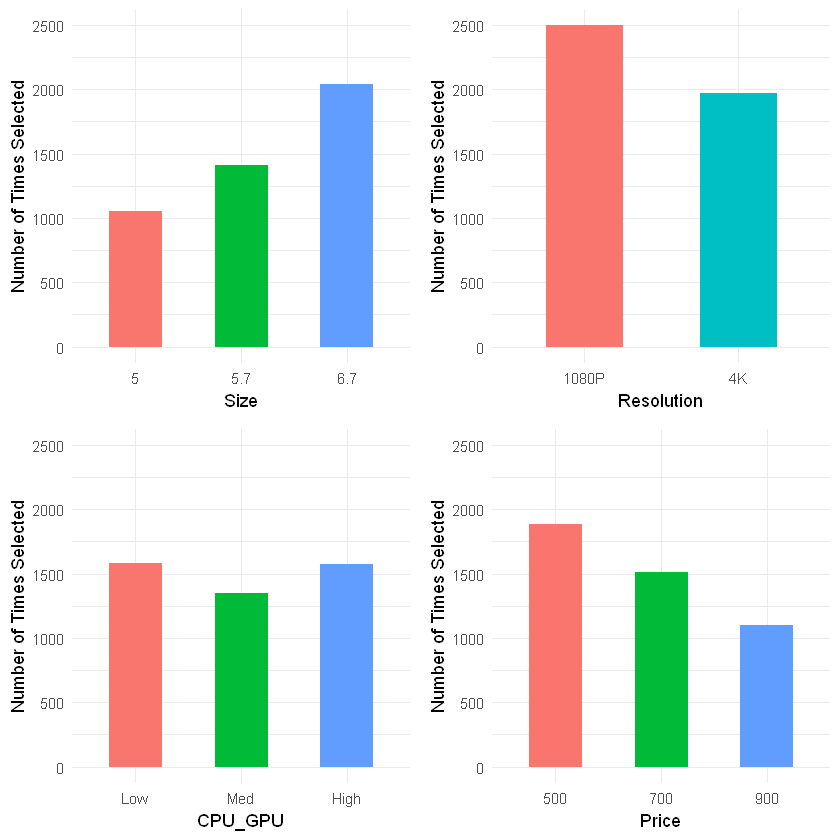

In [6]:
#install.packages('cowplot')
library(ggplot2)
suppressMessages(library(cowplot))
p1 = ggplot(data=conj.df) + geom_bar(aes(x=Size, y = choice, fill = Size), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p2 = ggplot(data=conj.df) + geom_bar(aes(x=Resolution, y = choice, fill = Resolution), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p3 = ggplot(data=conj.df) + geom_bar(aes(x=CPU_GPU, y = choice, fill = CPU_GPU), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p4 = ggplot(data=conj.df) + geom_bar(aes(x=price, y = choice, fill = price), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + xlab('Price') + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")

plot_grid(p1, p2, p3, p4, labels="", align="v")

#### Analysis
As stated above, the simulated respondents selects their choice between two bundles of smartphone factor levels and their choice is recorded. The charts above show those factor level included in those bundle choices. For example, their is a clear preference for low cost smartphones given that bundles with both $700 and $500 levels were selected more than $900. Similarily, their is a clear preference for bundles with larger screens and 1080p. Bundles with high and low powered CPU_GPUs are also more favoured, although the differences aren't large.

In [7]:
#install.packages('mlogit')
#Run the conjoint analysis
suppressMessages(library(mlogit))
conj.mlogit <- mlogit.data(data=conj.df, choice="choice", shape="long",
                            varying=3:6, alt.levels=paste("pos",1:3),
                            id.var="resp.id")

m1 <- mlogit(choice ~ 0 + Size  + Resolution  + CPU_GPU + price, data = conj.mlogit)
summary(m1)
#The Estimate lists the mean values for each level; these must be interpreted
#relative to the base levels of each factorute.


Call:
mlogit(formula = choice ~ 0 + Size + Resolution + CPU_GPU + price, 
    data = conj.mlogit, method = "nr")

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.33711 0.34089 0.32200 

nr method
4 iterations, 0h:0m:0s 
g'(-H)^-1g = 0.00563 
successive function values within tolerance limits 

Coefficients :
               Estimate Std. Error  z-value  Pr(>|z|)    
Size5.7       0.4130695  0.0490438   8.4225 < 2.2e-16 ***
Size6.7       1.0541816  0.0487020  21.6455 < 2.2e-16 ***
Resolution4K -0.4114089  0.0381790 -10.7758 < 2.2e-16 ***
CPU_GPUMed   -0.2433099  0.0471399  -5.1614 2.451e-07 ***
CPU_GPUHigh   0.0056961  0.0461891   0.1233    0.9019    
price700     -0.3821829  0.0458116  -8.3425 < 2.2e-16 ***
price900     -0.8606885  0.0485738 -17.7192 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log-Likelihood: -4454.8

#### ANALYSIS  
The size of the coefficients give us an idea of factor level importance. Size 6.7 inches of the screen is the most important factor level. It is also positively correlated, meaning including it increases the likelihood of a bundle will be selected. Another important factor level is Price at 900 dollars. It is negatively correlated so including it reduces the likelihood of a bundle being selected. Similarly, 4K Resoltuion follows a similar pattern to Price at 900 dollars, although the effect is not as strong.

In [8]:
#Predicting Choice Share

predict.mnl <- function(model, data) {
  # Function for predicting shares from a multinomial logit model
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to
  # predict shares. Same format as the data used to estimate model.
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
  utility <- data.model%*%model$coef
  share <- exp(utility)/sum(exp(utility))
  cbind(share, data)
}

#Create a new set of design then pass to the predict model
new.data <- expand.grid(factor)[c(8, 1, 3, 41, 49, 26, 5),]

#Simulating Choice Shares
predict.mnl(m1, new.data)

,share,Size,Resolution,CPU_GPU,price
,<dbl>,<fct>,<fct>,<fct>,<fct>
8,0.15362357,5.7,1080P,Med,500
1,0.12963796,5,1080P,Low,500
3,0.37201241,6.7,1080P,Low,500
41,0.05491122,5.7,4K,Low,900
49,0.05513327,5,1080P,High,900
26,0.10482815,5.7,1080P,Med,700
5,0.12985342,5.7,4K,Low,500


#### ANALYSIS  
In a hypothertical market where we limit smartphones to 7 models, a bundle with 6.7 inches in size, 1080P screen, high powered CPU_GPU and 500 dollars in price would garner a large piece of the market, 37%. On the other hand, a bundle with 5 inches in size, 1080P screen, high powered CPU_GPU and 900 dollars in price would only take 5.5% of the market.

In [9]:
#Share Predictions for Identical Alternatives
new.data.2 <- expand.grid(factor)[c(8, 8, 1, 3, 41, 49, 26), ]
predict.mnl(m1, new.data.2)

,share,Size,Resolution,CPU_GPU,price
,<dbl>,<fct>,<fct>,<fct>,<fct>
8,0.15005670,5.7,1080P,Med,500
8.1,0.15005670,5.7,1080P,Med,500
1,0.12662799,5,1080P,Low,500
3,0.36337494,6.7,1080P,Low,500
41,0.05363628,5.7,4K,Low,900
49,0.05385317,5,1080P,High,900
26,0.10239423,5.7,1080P,Med,700


#### ANALYSIS  
In this particular methodology, adding an exact duplicate of a smartphone halves the marketshare exactly.

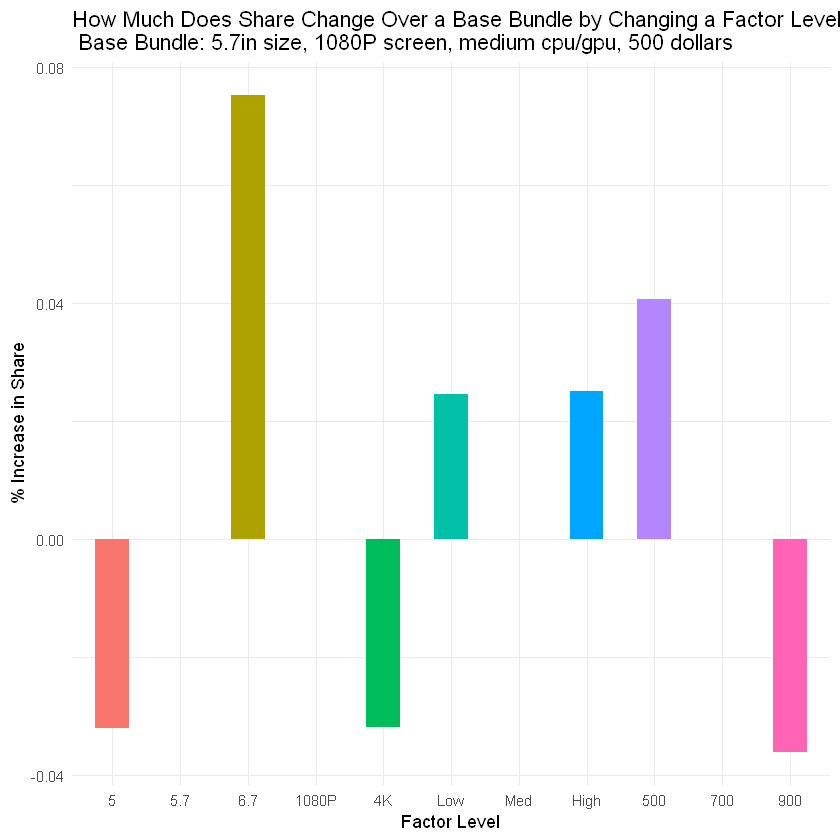

In [10]:
#Sensitity
sensitivity.mnl <- function(model, factor, base.data, competitor.data) {
  #Function for creating data for a share-sensitivity chart
  #model: mlogit object returned by mlogit() function
  #factor: list of vectors with factorute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame containing design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.mnl(model, data)[1,1]
  share <- NULL
  for (a in seq_along(factor)) {
    for (i in factor[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.mnl(model, data)[1,1])
    }
  }
  data.frame(level=unlist(factor), share=share, increase=share-base.share)
}

base.data <- expand.grid(factor)[c(26), ]
competitor.data <- expand.grid(factor)[c(1, 3, 41, 49, 22, 33), ]
tradeoff <- sensitivity.mnl(m1, factor, base.data, competitor.data)

#The plot in Fig. 13.2 shows how share would change if we
#changed each of the factorutes of the design, one at a time.

tradeoff$level <- factor(tradeoff$level, levels = c("5", "5.7", "6.7",
                                                    "1080P", "4K", "Low",
                                                    "Med", "High", "500", "700",
                                                    "900"))
                                                    
ggplot(data=tradeoff) + geom_bar(aes(x=level, y =increase, fill = level), stat="identity", width=0.5) +
 ylab('% Increase in Share') + xlab('Factor Level') +
 ggtitle("How Much Does Share Change Over a Base Bundle by Changing a Factor Level?\n Base Bundle: 5.7in size, 1080P screen, medium cpu/gpu, 500 dollars") +
 theme_minimal() + theme(legend.position="none")

#### ANALYSIS
The base bundle is a Smartphone with 5.7 inches in size, a 1080P screen, a medium cpu/gpu combo priced at 500 dollars. Increasing the size to 6.7 inches, while keeping all other factors the same would increase market share by nearly 8 percent. On the other hand, boosting the price by 200 dollars to 900 dollars would hurt share by nearly 4%.